In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [2]:
toyota = pd.read_csv("ToyotaCorolla.csv",encoding="unicode_escape")
toyota.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [3]:
toyota1=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
toyota1.rename(columns={'Age_08_04':'age','Quarterly_Tax':'QT'},inplace='True')

C:\Users\91767\AppData\Local\Temp\ipykernel_15324\3357153112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota1.rename(columns={'Age_08_04':'age','Quarterly_Tax':'QT'},inplace='True')


In [5]:
toyota1.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [6]:
toyota1.corr()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


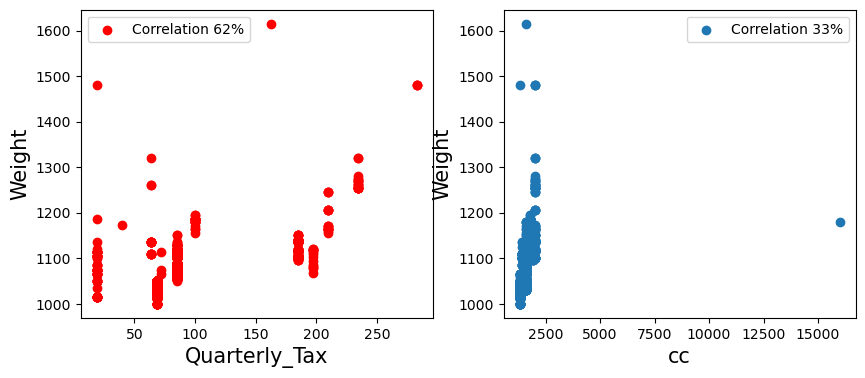

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(toyota1["QT"],toyota1["Weight"],color="red",label="Correlation 62%")
plt.xlabel("Quarterly_Tax",size=15)
plt.ylabel("Weight",size=15)
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.scatter(toyota1["cc"],toyota1["Weight"],label="Correlation 33%")
plt.xlabel("cc",size=15)
plt.ylabel("Weight",size=15)
plt.legend(loc="best")

<AxesSubplot:>

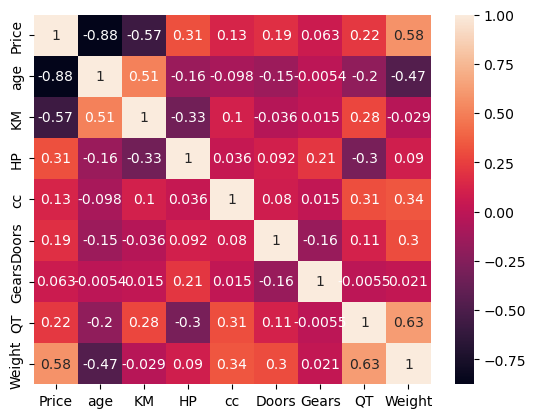

In [8]:
sns.heatmap(toyota1.corr(),annot=True)

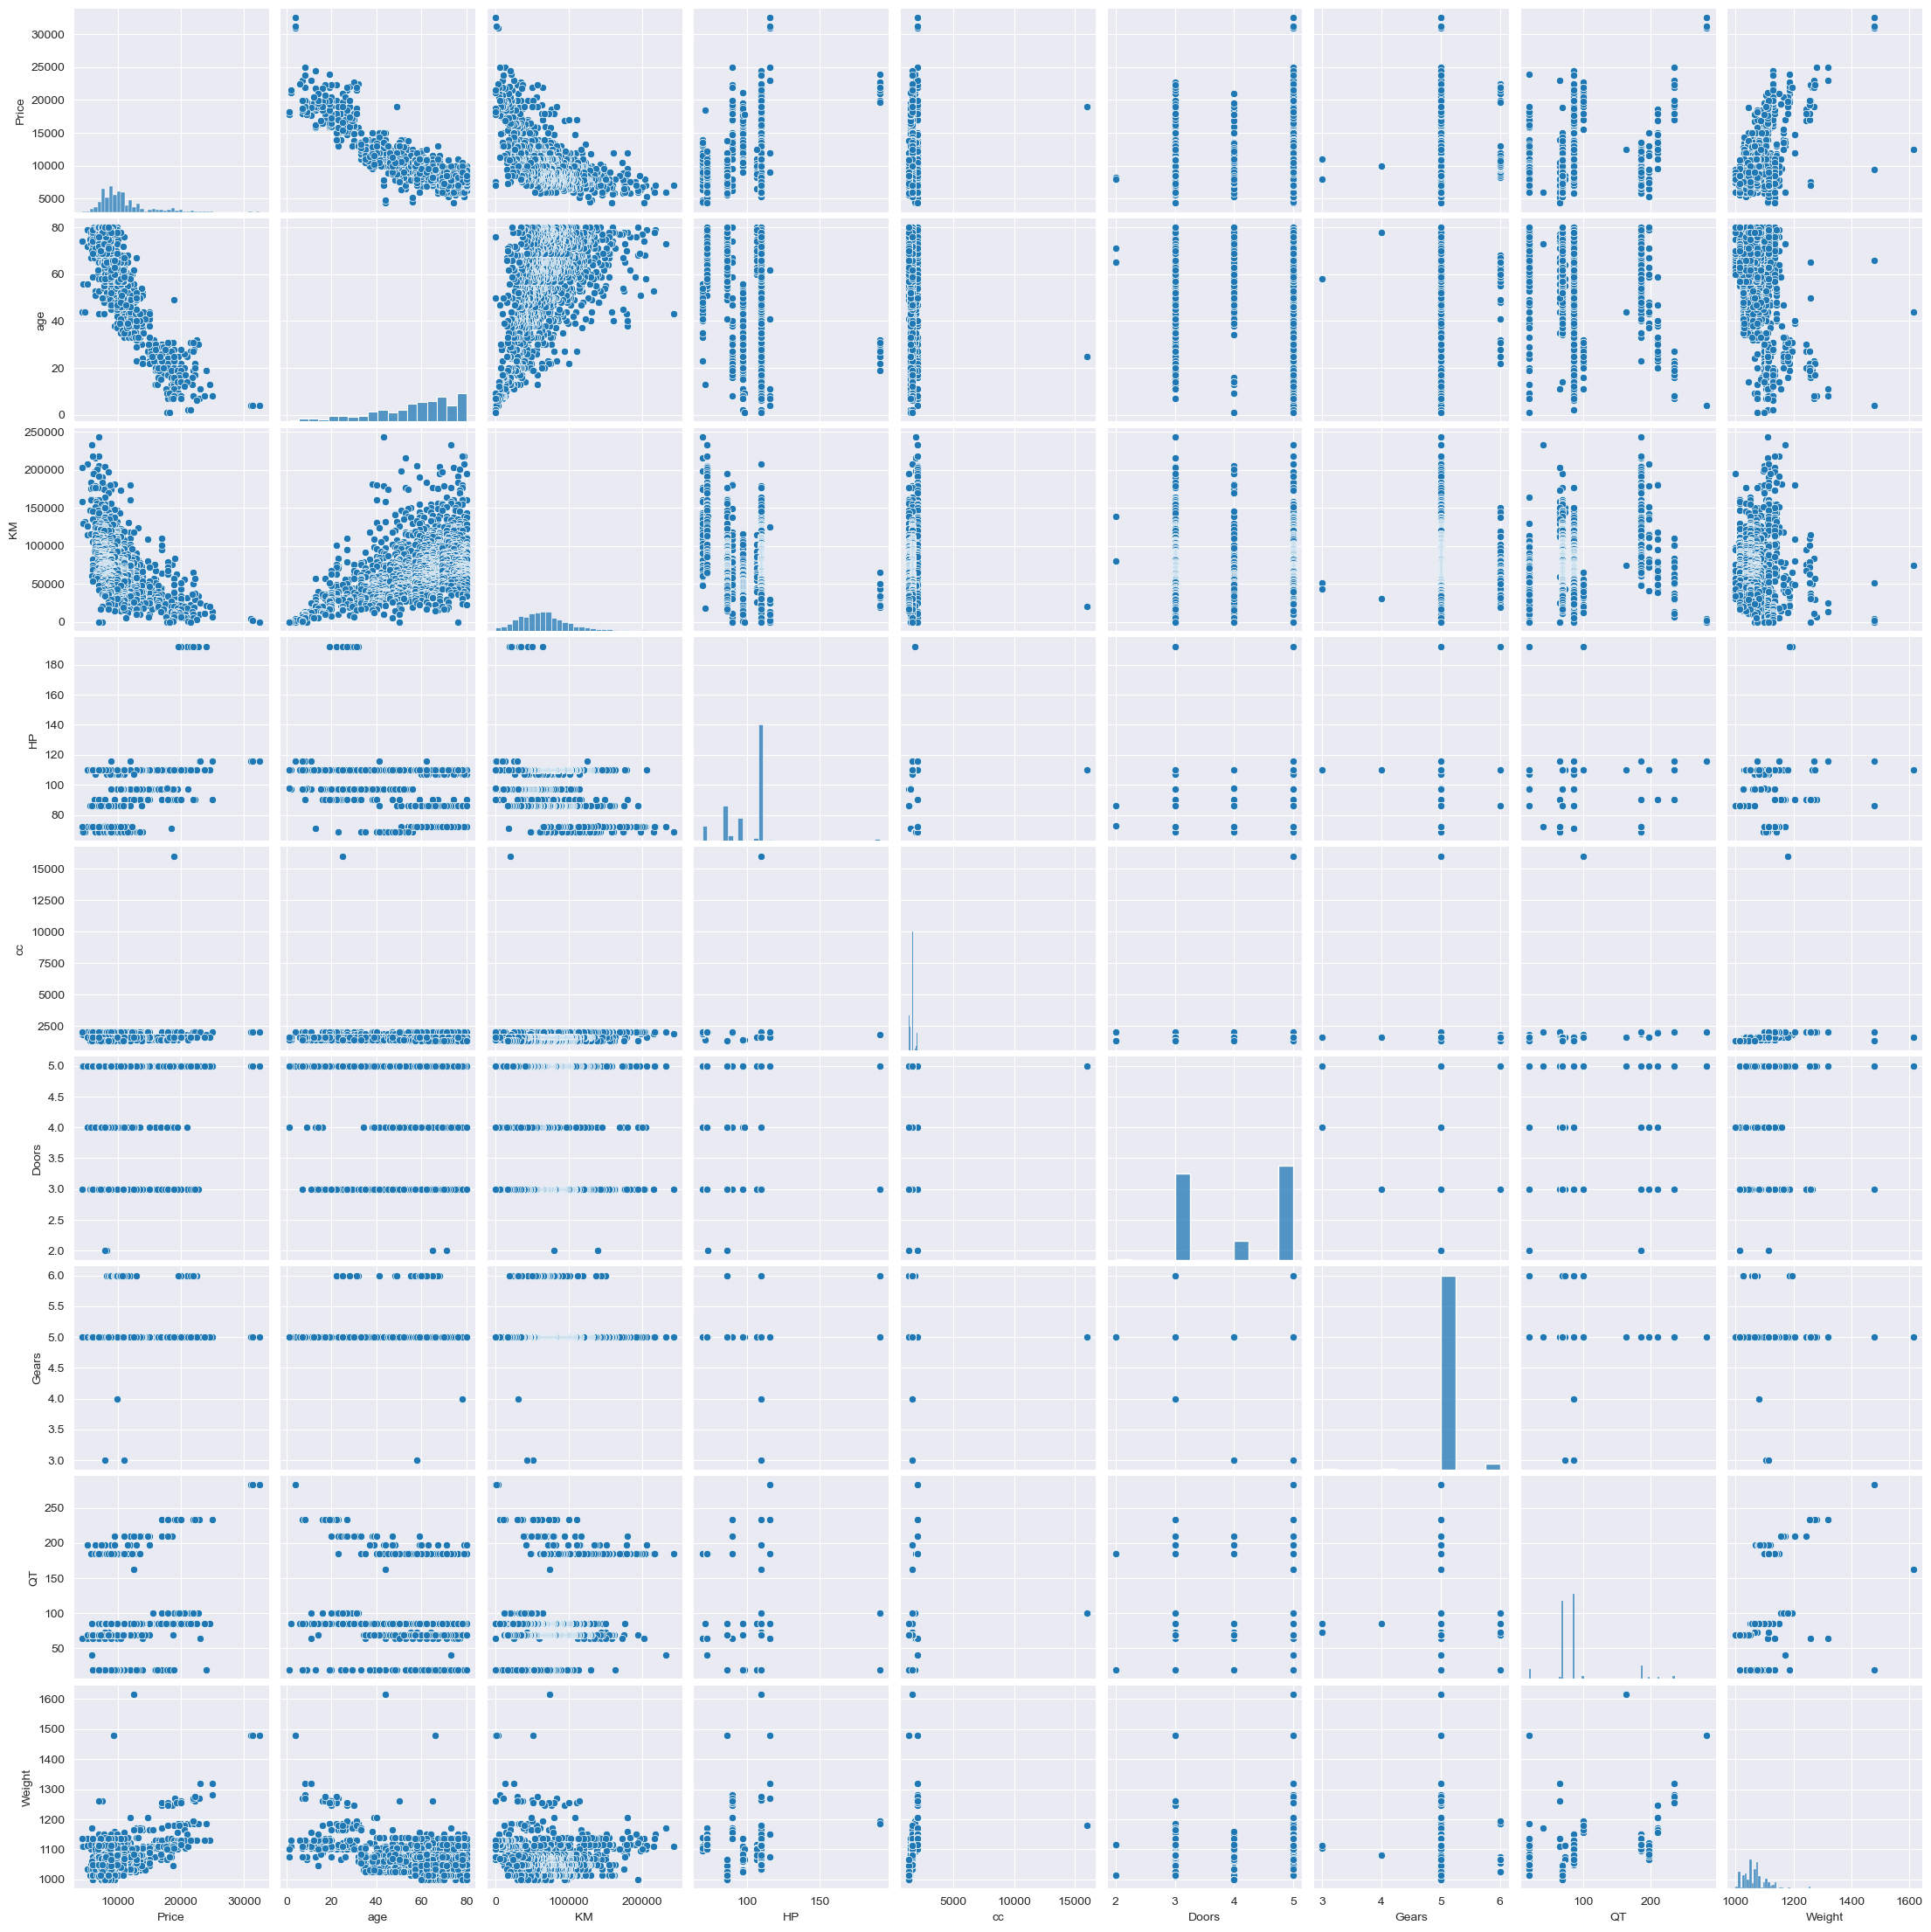

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Weight+QT',data=toyota1).fit()

In [11]:
model.rsquared

0.8637627463428191

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:03:51   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
QT             3.9491      1.310      3.015      0.003       1.379       6.519
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

# VIF CALCULATION

In [46]:
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+Weight+QT ',data=toyota1).fit().rsquared  
vif_age = 1/(1-rsq_age) 
vif_age

1.8846198056602872

In [15]:
rsq_KM = smf.ols('KM~age+HP+cc+Doors+Gears+Weight+QT',data=toyota1).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 
vif_KM

1.7569047782042881

In [16]:
rsq_HP = smf.ols('HP~KM+age+cc+Doors+Gears+Weight+QT ',data=toyota1).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 
vif_HP

1.4194221086310974

In [17]:
rsq_cc = smf.ols('cc~KM+HP+age+Doors+Gears+Weight+QT',data=toyota1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 
vif_cc

1.16389398494238

In [18]:
rsq_Doors = smf.ols('Doors~KM+HP+cc+age+Gears+Weight+QT',data=toyota1).fit().rsquared  
vif_Doors= 1/(1-rsq_Doors) 
vif_Doors

1.1565752070760436

In [19]:
rsq_Gears = smf.ols('Gears~KM+HP+cc+Doors+age+Weight+QT',data=toyota1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
vif_Gears

1.098723019347037

In [20]:
rsq_Weight = smf.ols('Weight~KM+HP+cc+Doors+Gears+age+QT',data=toyota1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 
vif_Weight

2.516419837445869

In [21]:
rsq_Quarterly_Tax= smf.ols('QT~KM+HP+cc+Doors+Gears+Weight+age ',data=toyota1).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) 
vif_Quarterly_Tax

2.311430811531038

In [22]:
d1 = {'Variables':['age','HP','cc','Doors','Gears','KM','QT','Weight'],'VIF':[vif_age,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_KM,vif_Quarterly_Tax,vif_Weight]}
VIF_frame = pd.DataFrame(d1)  
VIF_frame

,Variables,VIF
0,age,1.884620
1,HP,1.419422
2,cc,1.163894
3,Doors,1.156575
4,Gears,1.098723
5,KM,1.756905
6,QT,2.311431
7,Weight,2.516420


# TEST FOR NORMALITY OF RESIDUALS

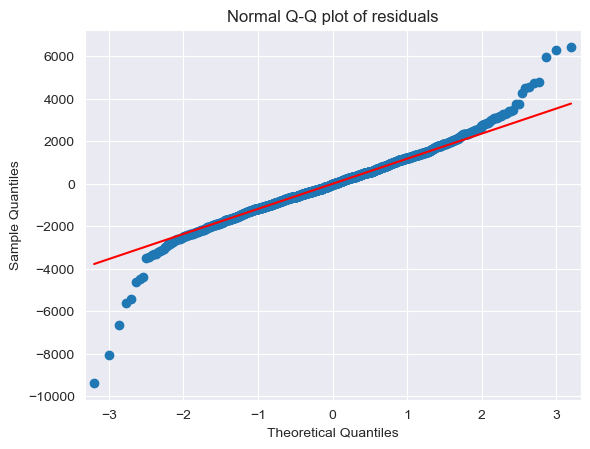

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# RESIDUAL PLOT FOR HOMOSCEDASTICITY

In [48]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

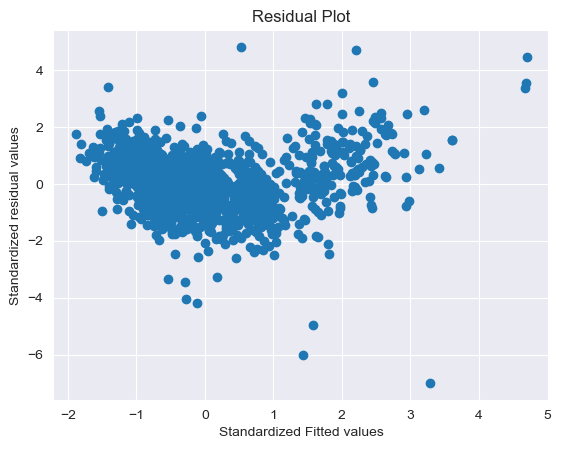

In [49]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# RESIDUALS VS REGRESSION

eval_env: 1


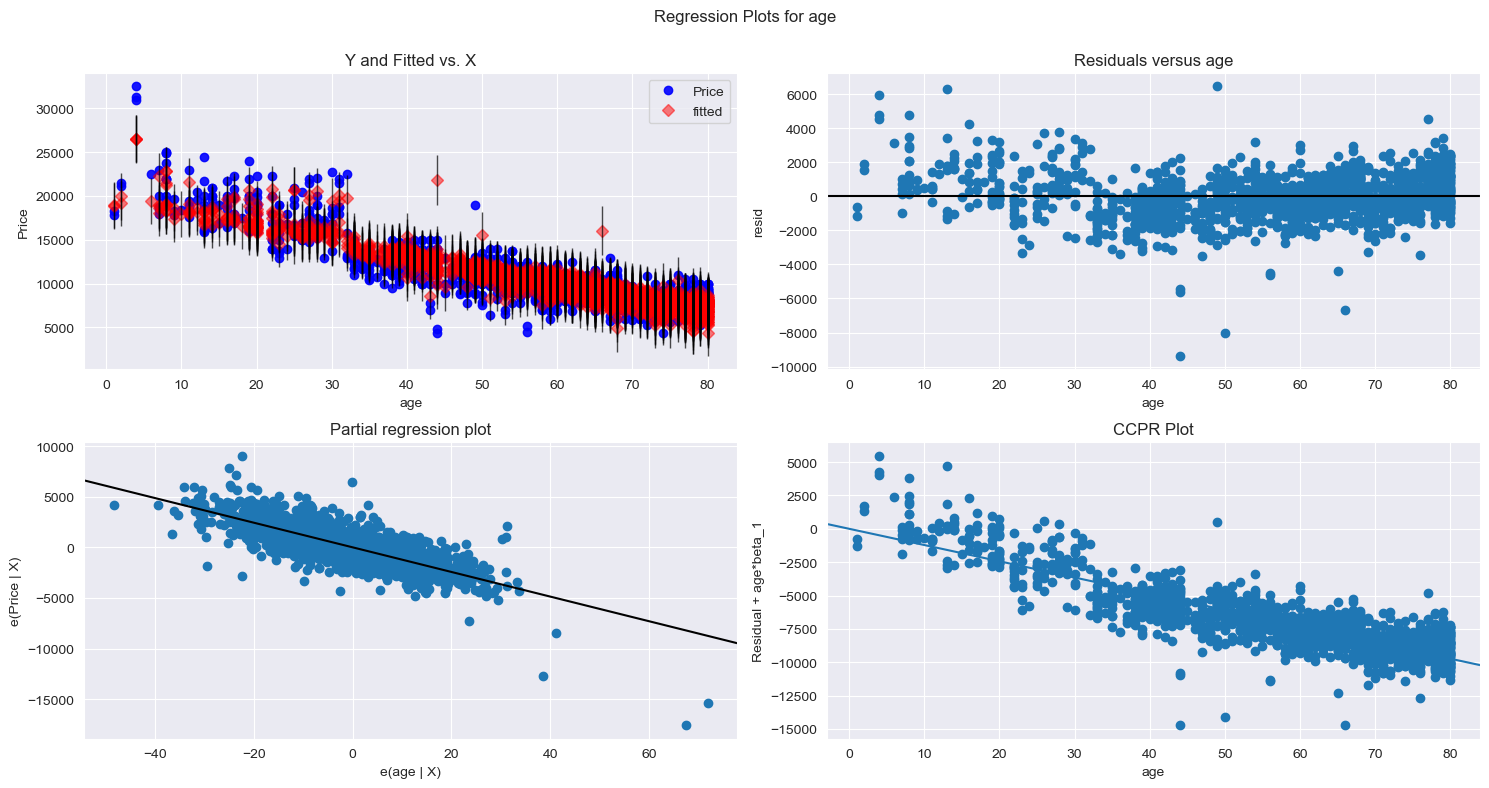

In [50]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

eval_env: 1


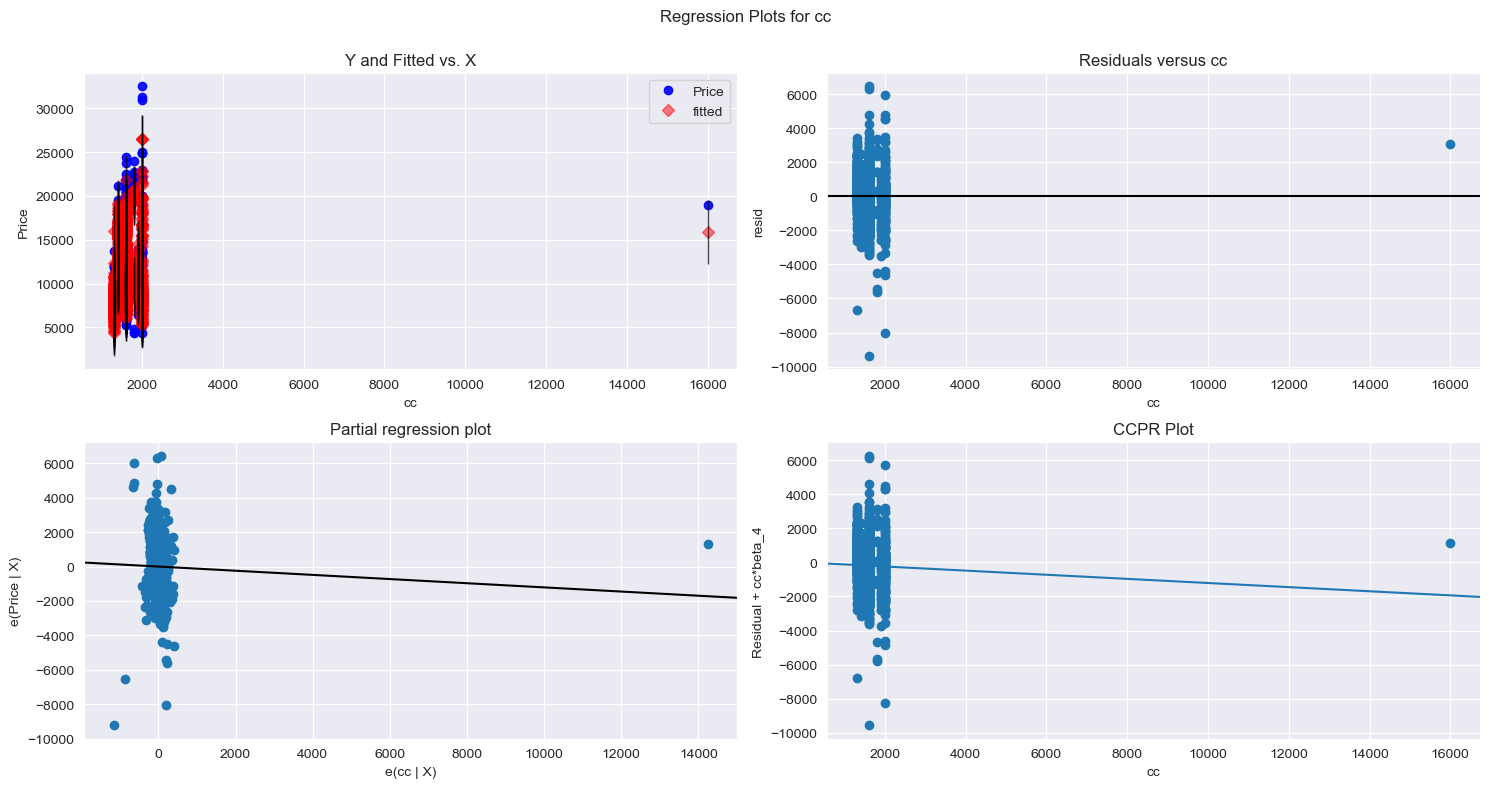

In [51]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


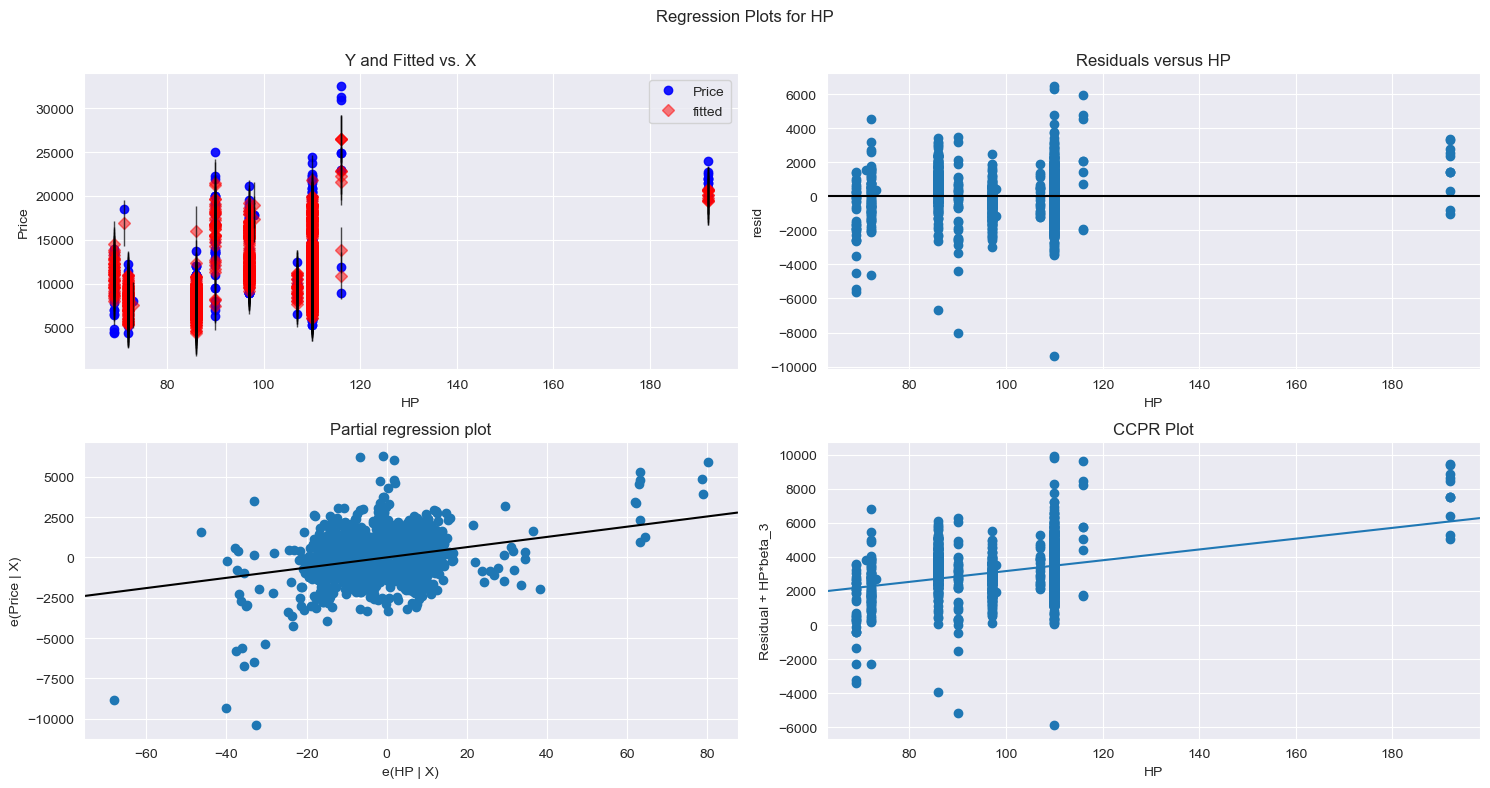

In [52]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


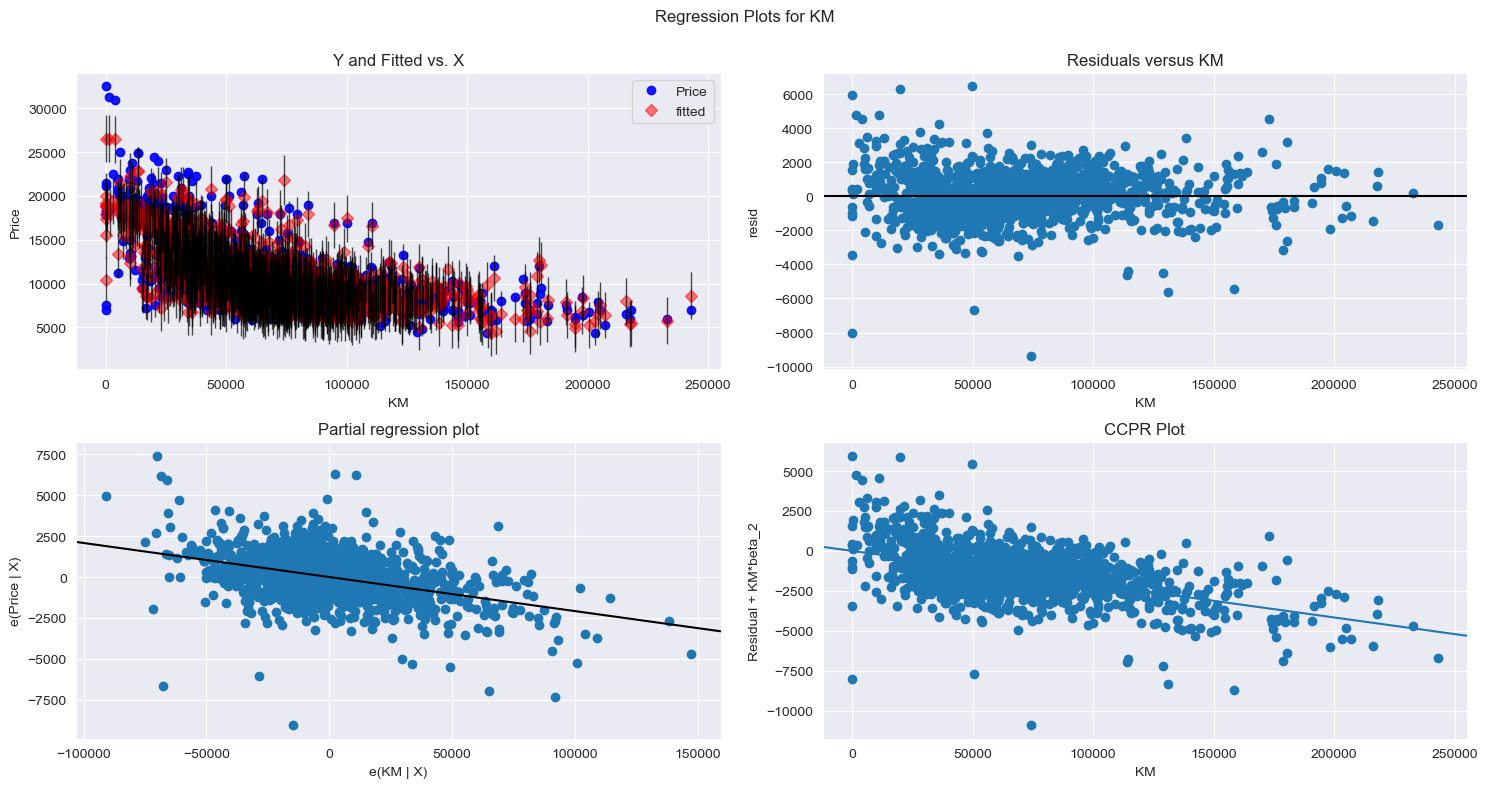

In [53]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


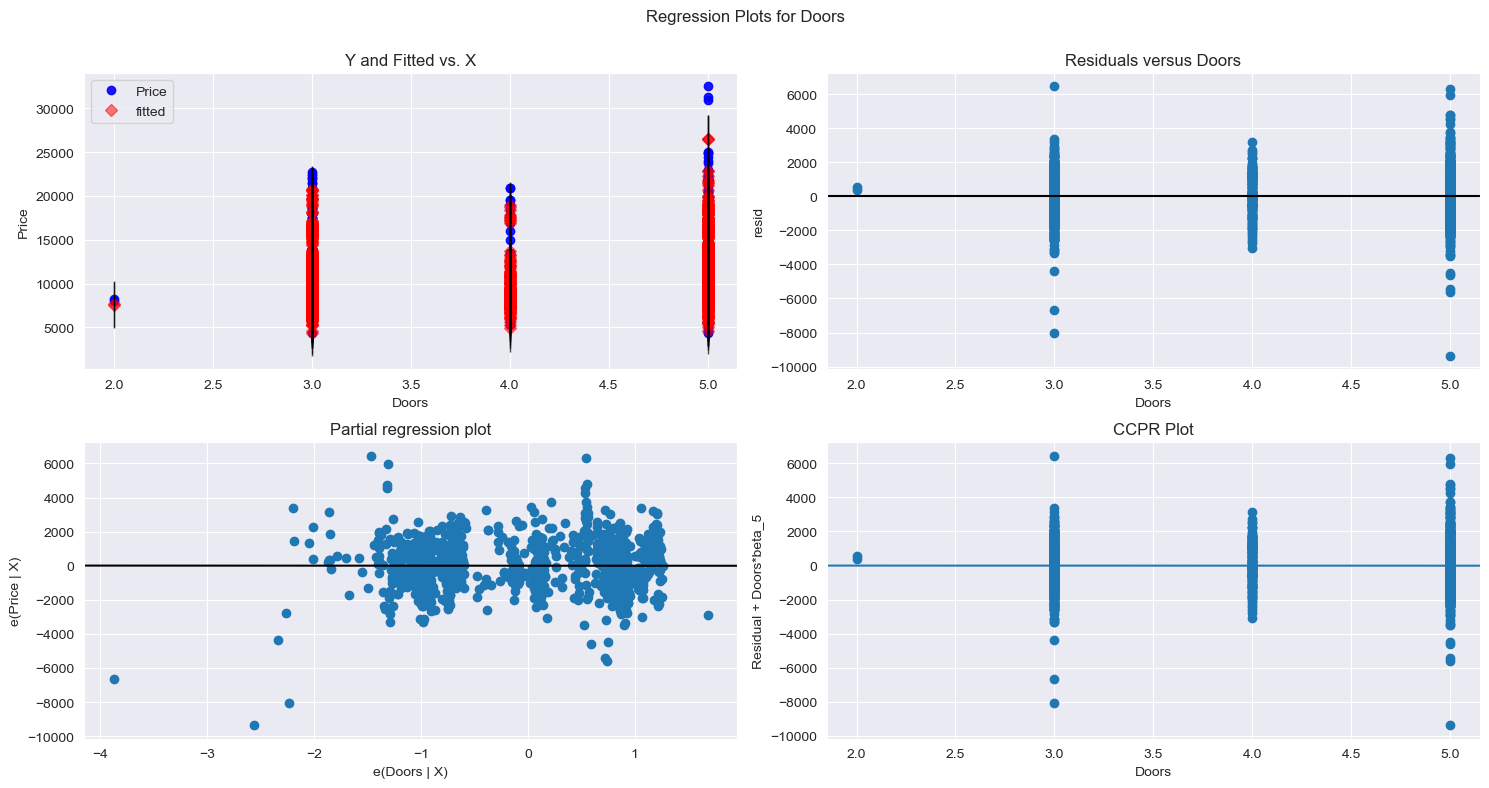

In [54]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


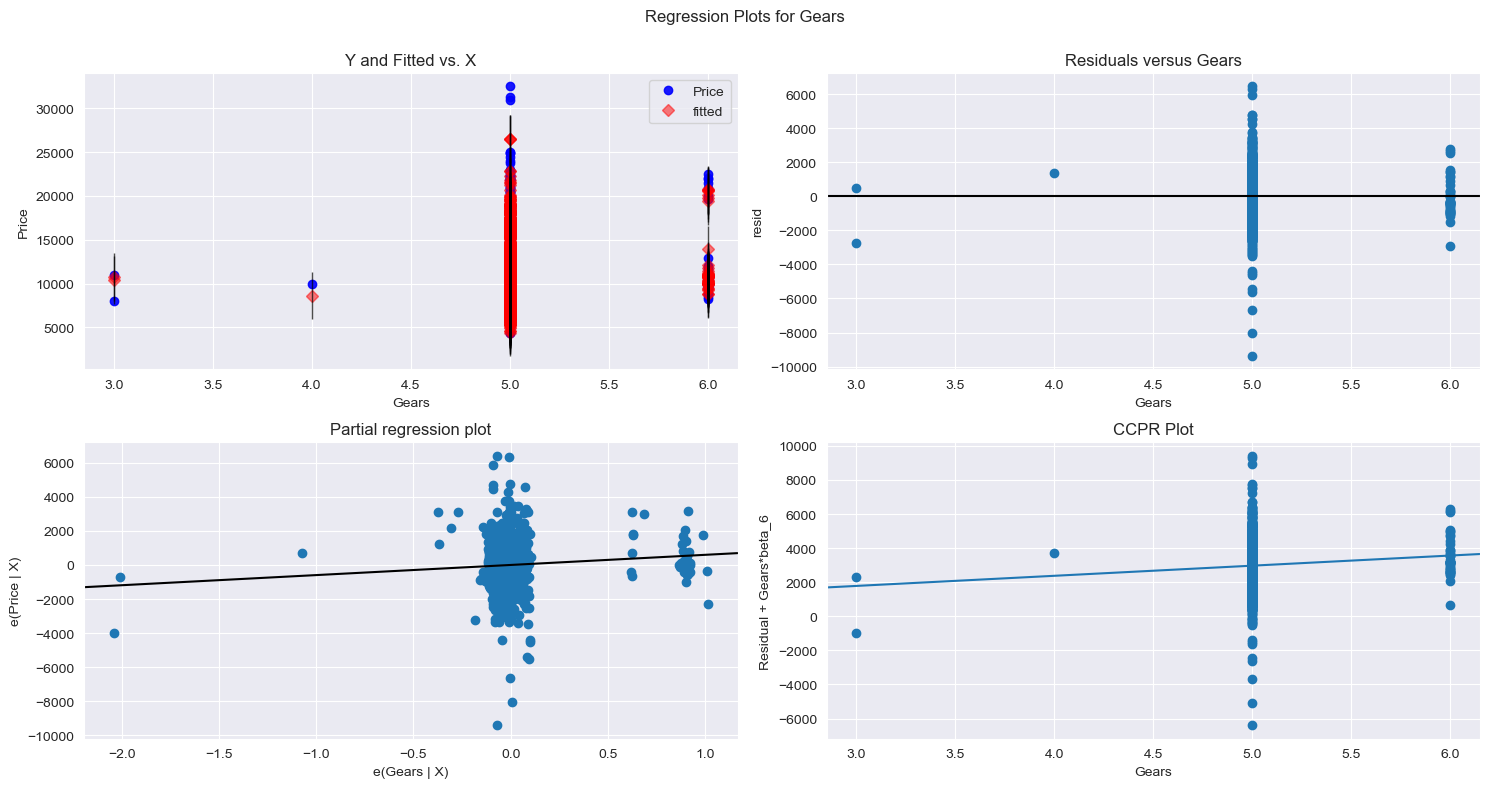

In [55]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


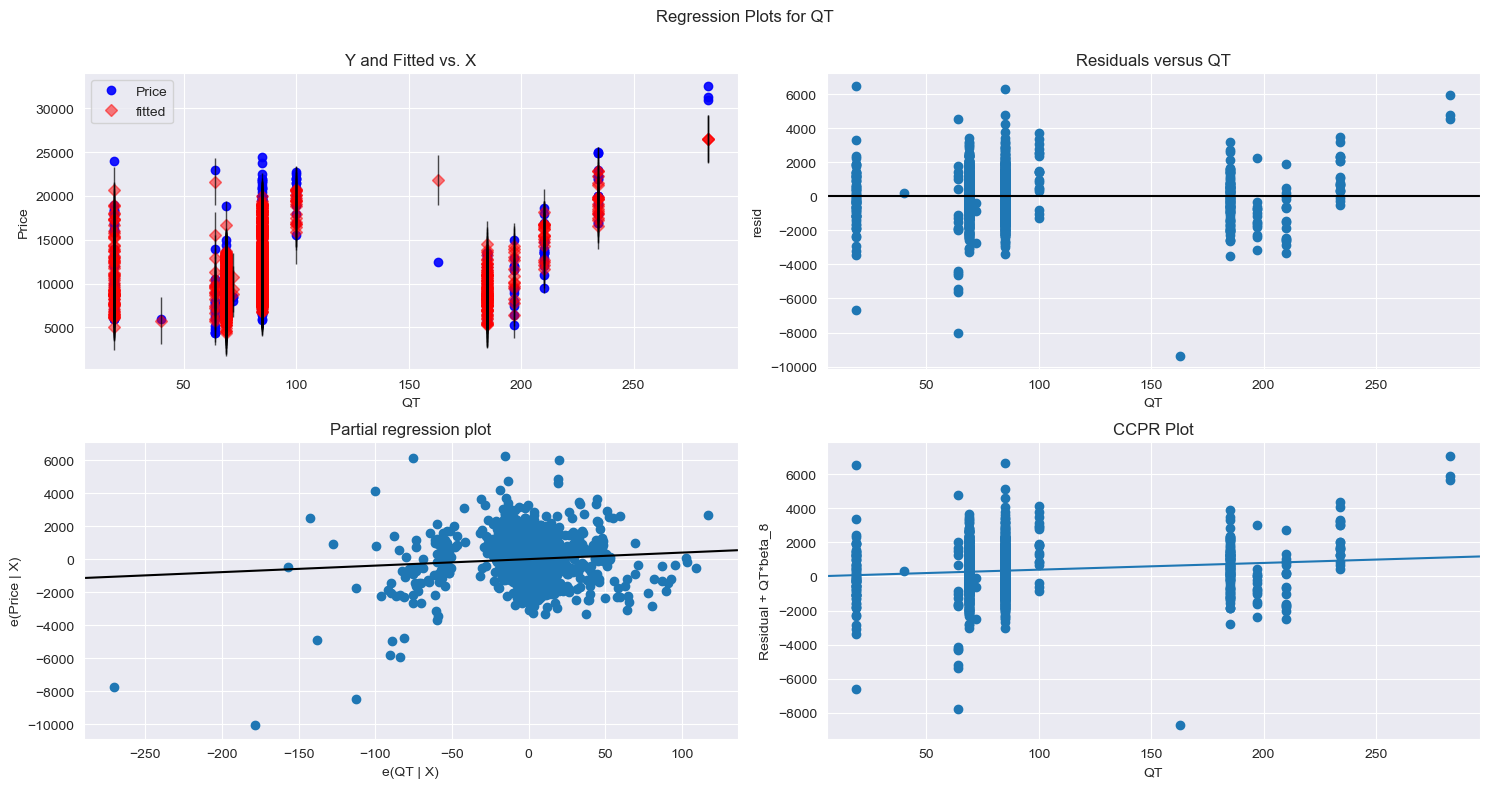

In [56]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

eval_env: 1


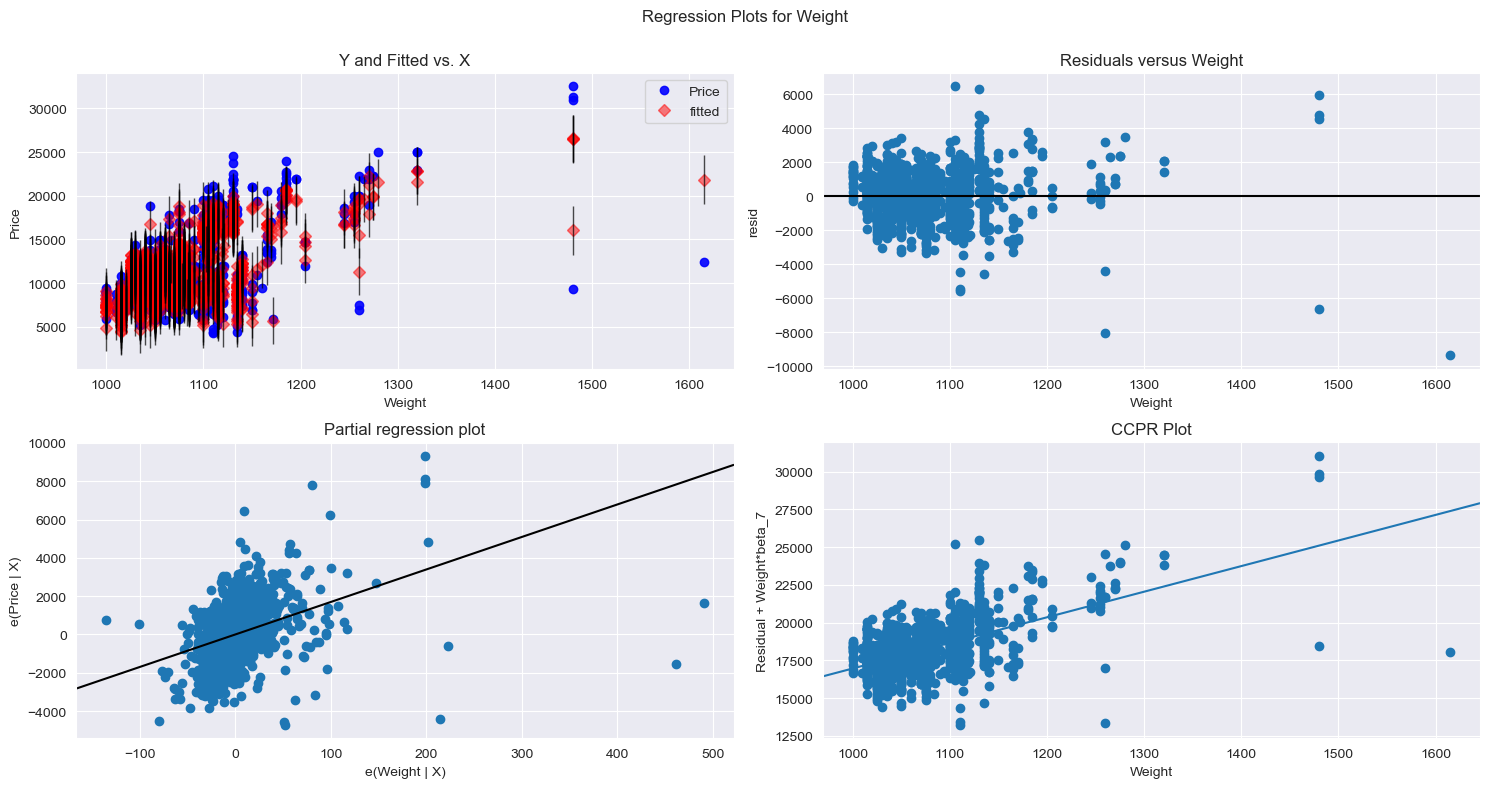

In [57]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# COOK'S DISTANCE

In [36]:
model_influence = model.get_influence()
(t, _) = model_influence.cooks_distance

In [37]:
K=8
N=1436
3*(K+1)/N

0.018802228412256268

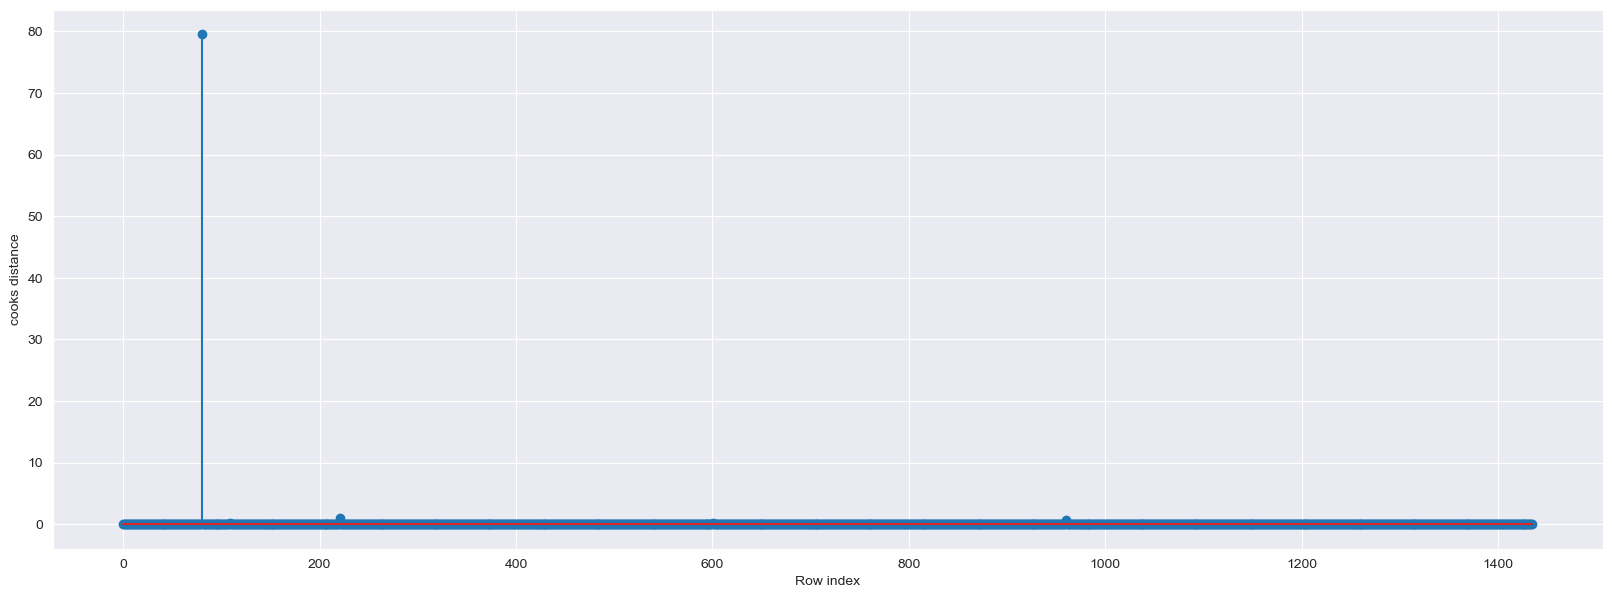

In [60]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(t,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [38]:
(np.argmax(t),np.max(t))

(80, 79.52010624136688)

In [39]:
np.where(t>0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [40]:
toyota2=toyota1.drop(toyota1.index[[14,16,49,80,109,110,111,141,191,192,221,523,601,654,960,991,1058]],axis=0).reset_index()

In [41]:
toyota2=toyota2.drop(['index'],axis=1)

In [42]:
toyota2

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1414,7500,69,20544,86,1300,3,5,69,1025
1415,10845,72,19000,86,1300,3,5,69,1015
1416,8500,71,17016,86,1300,3,5,69,1015
1417,7250,70,16916,86,1300,3,5,69,1015


# BUILD MODEL

In [43]:
final = smf.ols('Price~QT+Weight+KM+HP+cc+Doors+Gears+age',data=toyota2).fit()

In [44]:
(final.rsquared,final.aic)

(0.8876657300062551, 24047.875456639107)

In [45]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:04:09   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
QT             2.1111      1.358      1.555      0.120      -0.553       4.775
Weight        31.4161      1.395     22.514      0.000      28.679      34.153
KM            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP            28.9815      2.768     10.472      0.000      23.552      34.410
cc            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
final.predict(toyota2[['QT', 'Weight', 'HP', 'KM', 'Doors', 'Gears', 'cc',
       'age']])

0       16310.888673
1       15857.336139
2       16291.658688
3       15958.899033
4       15836.323468
            ...     
1414     9182.068160
1415     8560.624043
1416     8706.721503
1417     8819.891793
1418    10878.107228
Length: 1419, dtype: float64